**<h1> SMS SPAM CLASSIFIER</h1>**

This spam SMS dataset has 1000 ham SMS and 1000 spam messages. For collecting this SMS, Yadav, K., Kumaraguru, P., Goyal, A., Gupta, A., and Naik ran an incentivized crowd-sourcing scheme on their campus in 2011. It contains both Hindi and English messages collected from 43 participants.  

Dataset link : http://precog.iiitd.edu.in/requester.php?dataset=smsspam.



**<h2>Feature Engineering and Modelling</h2>**

In [ ]:
# importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score, recall_score ,f1_score , confusion_matrix
from sklearn.naive_bayes import GaussianNB 
import nltk
nltk.download('punkt')
%matplotlib inline
from wordcloud import WordCloud
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<h3> Modelling on Final Dataset </h3>


In [ ]:
# reading  final dataset
data = pd.read_csv("indianspam.csv")
data.head()

,v1,v2
0,ham,zyada itrao mat . english meko bi aati hai :-P
1,ham,is ajnbi dunia me akle 1 khwab hu swalon se k...
2,ham,Husband n wife were opening joint bank ac Husb...
3,ham,Husband Suhag raat pe- Tum ne kabhi Blue Film ...
4,ham,indagi me 5 cheez kabhi bhi aa sakti h 'Hum' '...


In [ ]:
data.shape

(2000, 2)

In [ ]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      2000 non-null   object
 1   v2      2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
# Renaming Columns
data.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
data.head()

,target,text
0,ham,zyada itrao mat . english meko bi aati hai :-P
1,ham,is ajnbi dunia me akle 1 khwab hu swalon se k...
2,ham,Husband n wife were opening joint bank ac Husb...
3,ham,Husband Suhag raat pe- Tum ne kabhi Blue Film ...
4,ham,indagi me 5 cheez kabhi bhi aa sakti h 'Hum' '...


In [ ]:
# converting target variable into a Binary type( 0 and 1)
# converting spam --> 1 and Ham --> 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target']=encoder.fit_transform(data['target'])

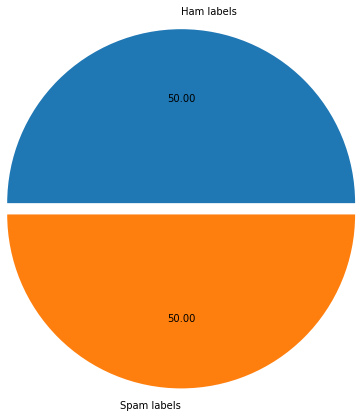

In [ ]:
# Pie Chart for class distribution
explode = (0,0.13) 
plt.pie(data['target'].value_counts(), labels=['Ham labels','Spam labels'],autopct="%0.2f",radius = 2, explode = explode)
plt.show()

In [ ]:
# Checking for null values
data.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# Checking for the duplicated values
print(data.duplicated().sum())

1


In [ ]:
# Rechecking any duplicate rows after removing duplicates from the dataset
data.duplicated().sum()

1

In [ ]:
# Removing duplicates rows from the dataset
data = data.drop_duplicates(keep='first')

In [ ]:
# Shape of the dataset after removing dupliactes rows
data.shape

(1999, 2)

In [ ]:
# Adding a new column to the dataset length (character length)
data['length'] = data['text'].apply(len)
data.head(3)

,target,text,length
0,0,zyada itrao mat . english meko bi aati hai :-P,47
1,0,is ajnbi dunia me akle 1 khwab hu swalon se k...,159
2,0,Husband n wife were opening joint bank ac Husb...,159


In [ ]:
# Adding a new column word count
data['word_count'] = data['text'].apply((lambda x:len(nltk.word_tokenize(x))))
data.head()

,target,text,length,word_count
0,0,zyada itrao mat . english meko bi aati hai :-P,47,11
1,0,is ajnbi dunia me akle 1 khwab hu swalon se k...,159,38
2,0,Husband n wife were opening joint bank ac Husb...,159,26
3,0,Husband Suhag raat pe- Tum ne kabhi Blue Film ...,161,34
4,0,indagi me 5 cheez kabhi bhi aa sakti h 'Hum' '...,137,35


In [ ]:
# Adding a new column sentence length
data['sentence_count'] = data['text'].apply((lambda x:len(nltk.sent_tokenize(x))))
data.head()

,target,text,length,word_count,sentence_count
0,0,zyada itrao mat . english meko bi aati hai :-P,47,11,2
1,0,is ajnbi dunia me akle 1 khwab hu swalon se k...,159,38,2
2,0,Husband n wife were opening joint bank ac Husb...,159,26,1
3,0,Husband Suhag raat pe- Tum ne kabhi Blue Film ...,161,34,4
4,0,indagi me 5 cheez kabhi bhi aa sakti h 'Hum' '...,137,35,1


In [ ]:
def digits_count(string):
    '''
    Function to compute number of digits in a given text
    '''
    digit_count = 0
    for i in range(len(string)):
        if(string[i].isalpha()):
            continue
        elif(string[i].isdigit()):
            digit_count += 1 
        elif(string[i] == ' '):
            continue
        else:
            continue
    return digit_count
data['digits_count'] = data['text'].map(digits_count)
data.head()
# Reference : https://stackoverflow.com/questions/24878174/how-to-count-digits-letters-spaces-for-a-string-in-python

,target,text,length,word_count,sentence_count,digits_count
0,0,zyada itrao mat . english meko bi aati hai :-P,47,11,2,0
1,0,is ajnbi dunia me akle 1 khwab hu swalon se k...,159,38,2,1
2,0,Husband n wife were opening joint bank ac Husb...,159,26,1,0
3,0,Husband Suhag raat pe- Tum ne kabhi Blue Film ...,161,34,4,2
4,0,indagi me 5 cheez kabhi bhi aa sakti h 'Hum' '...,137,35,1,1


In [ ]:
# Count unique words
def count_unique_words(text):
    '''
    Function to compute number of unique word in a messages
    '''
    return len(set(text.split()))
data['unique_words_count'] = data['text'].apply(count_unique_words)

In [ ]:
# converting target variable into a Binary type( 0 and 1)
# converting spam --> 1 and Ham --> 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target']=encoder.fit_transform(data['target'])

In [ ]:
# Generating a word cloud image before data preprocessing

from PIL import Image

# Ham messages word cloud
mask = np.array(Image.open("/content/wc_image.jpg"))
ham_words = ' '.join(list(data[data['target'] == 0]['text']))
ham_wordcloud = WordCloud(background_color="black",width=520,height=520,collocations = False,mask = mask).generate(ham_words)
plt.figure(figsize=(17,10))
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ham messages word cloud")

# spam messages word cloud
mask = np.array(Image.open("/content/wc_image.jpg"))
spam_words = ' '.join(list(data[data['target'] == 1]['text']))
spam_wordcloud = WordCloud(background_color="black",width=520,height=520,collocations = False,mask = mask).generate(spam_words)
plt.figure(figsize=(17,10))
plt.imshow(spam_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Spam messsages word cloud")

#Reference : https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/

FileNotFoundError: ignored

In [ ]:
# Correlation matrix of features before data prprocessing
plt.figure(figsize=(12,6))
sns.heatmap(data=data.corr(),annot= True)
plt.show()

In [ ]:
# Expanding contractions (Decontractions)
# Contraction is the shortened form of a word like don’t stands for do not, aren’t stands for are not.
def decontracted(text):
    '''
    Function to expand the contractions
    '''
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text
# Reference : Donor Choose Preprocessing Noteook  , # https://stackoverflow.com/a/47091490/4084039

In [ ]:
# remove text from square brackets
text = "What a friend we have in jesus [all our sins] and grief to bear"
text = re.sub('\[.*?\]', '', text)
text
# Reference : https://stackoverflow.com/questions/2359921/how-to-remove-square-brackets-and-anything-between-them-with-a-regex

In [ ]:
# remove links
text = " Hello Please refer this link www.google.com"
text = re.sub('https?://\S+|www\.\S+', '', text)
text
# Reference : https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python

' Hello Please refer this link '

In [ ]:
 # Remove punctuation and special character
 def remove_punctuation(text):
     '''
     Function to remove special character and punctuation from text
     '''
     text = nltk.word_tokenize(text)
     lst = []
     for i in text:
        if i not in string.punctuation:
            lst.append(i)
     text = lst[:]
     return ' '.join(lst)

# alternate : sample=''.join([char for char in text if char not in string.punctuation])
# Reference : https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string

In [ ]:
# Remove Stopwords
def remove_stopwords(text):
  '''
  Function to rmove stopwords from a given text
  '''
  lst = []
  for char in text.split():
    if char not in stopwords.words('english'):
      lst.append(char)
  return ' '.join(lst)

remove_stopwords("Hello this is the text to remove stopwords")
#alternate : text = ' '.join([char for char in text.split() if char not in stopwords.words('english')])
# Reference : https://stackabuse.com/removing-stop-words-from-strings-in-python/

'Hello text remove stopwords'

In [ ]:
# remove digits
def remove_digits(text):
  '''
  Fuction to remove digits from a given text
  '''
  lst = []
  for char in text:
    if not char.isdigit():
      lst.append(char)
  return ''.join(lst)

remove_digits("Hel1lo 123 12hii34 how6575858are 55 3y2b3o2u")
#Reference : https://stackoverflow.com/questions/12851791/removing-numbers-from-string

'Hello  hii howare  ybou'

In [ ]:
# Remove extra spaces from the text
text = " Hello!!!   What are you  doing    I am fine thank you"
re.sub(' +', ' ', text)
#Reference : https://stackoverflow.com/questions/1546226/is-there-a-simple-way-to-remove-multiple-spaces-in-a-string

' Hello!!! What are you doing I am fine thank you'

In [ ]:
# remove everything except alphabets
def keep_alphabets(text):
  ''' 
  Function to remove everything except alphabet
  '''
  for i in text.split():
    for char in str(i):
      text = re.sub(r'[^a-zA-Z ]+', '', text)
  return text

keep_alphabets("Hello xyz123 I am student @t applied ai course. w#at are you doing")
#Reference : https://stackoverflow.com/questions/21564625/removing-everything-except-letters-and-spaces-from-string-in-python3-3

'Hello xyz I am student t applied ai course wat are you doing'

In [ ]:
# Stemming
# Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')
text = "lovely loving wanted publicly hearing dancing danced "
text = ' '.join(ps.stem(word) for word in text.split(' '))
text

# Reference : https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained

'love love want publicli hear danc danc '

In [ ]:
def data_preprocessing(text):

  '''
  Function to prepreocess and clean the data
  '''

  # lowercasing the text
  text = text.lower()

  # Expanding Contractions(Decontractions)
  text = decontracted(text)
  
  # remove text in square brackets
  text = re.sub('\[.*?\]', '', text)

  # remove links
  text = re.sub('https?://\S+|www\.\S+', '', text)

  # remove punctuation and special characters
  text = remove_punctuation(text)

  # remove stopwords
  text = remove_stopwords(text)

  # remove digits
  text = remove_digits(text)

  # remove everything except alphabet
  text = re.sub(r'[^a-zA-Z ]+', '', text)
  
  # remove extra spaces from the text
  text =  re.sub(' +', ' ', text)

  # Stemming
  text = ' '.join(ps.stem(word) for word in text.split(' '))

  return text

In [ ]:
preprocessed_data = pd.DataFrame()

In [ ]:
# creating a new column preprocessed text
preprocessed_data['preprocessed_text'] = data['text'].apply(data_preprocessing)
preprocessed_data.head()

NameError: ignored

In [ ]:
# Adding a new column to the dataset length (character length)
preprocessed_data['length'] = preprocessed_data['preprocessed_text'].apply(len)
preprocessed_data.head(3)

In [ ]:
# Adding a new column word count
preprocessed_data['word_count'] = preprocessed_data['preprocessed_text'].apply((lambda x:len(nltk.word_tokenize(x))))
preprocessed_data.head()

KeyError: ignored

In [ ]:
# Adding a new column sentence count
preprocessed_data['word_count'] = preprocessed_data['preprocessed_text'].apply((lambda x:len(nltk.sent_tokenize(x))))
preprocessed_data.head()

In [ ]:
# Adding a feature digits count
def digits_count(string):
    '''
    Function to compute number of digits in a given text
    '''
    digit_count = 0
    for i in range(len(string)):
        if(string[i].isalpha()):
            continue
        elif(string[i].isdigit()):
            digit_count += 1 
        elif(string[i] == ' '):
            continue
        else:
            continue
    return digit_count
preprocessed_data['digits_count'] = preprocessed_data['preprocessed_text'].map(digits_count)
preprocessed_data.head()
# Reference : https://stackoverflow.com/questions/24878174/how-to-count-digits-letters-spaces-for-a-string-in-python

In [ ]:
# Count unique words
def count_unique_words(text):
    '''
    Function to compute number of unique word in a messages
    '''
    return len(set(text.split()))
preprocessed_data['unique_words_count'] = preprocessed_data['preprocessed_text'].apply(count_unique_words)

In [ ]:
preprocessed_data.head()

In [ ]:
preprocessed_data['target'] = data['target']

In [ ]:
# converting target variable into a Binary type( 0 and 1)
# converting spam --> 1 and Ham --> 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
preprocessed_data['target']=encoder.fit_transform(preprocessed_data['target'])

In [ ]:
preprocessed_data.head()

In [ ]:
# Generating a word cloud image after data preprocessing

from PIL import Image

# Ham messages word cloud
mask = np.array(Image.open("/content/wc_image.jpg"))
ham_words = ' '.join(list(preprocessed_data[preprocessed_data['target'] == 0]['preprocessed_text']))
ham_wordcloud = WordCloud(background_color="black",width=520,height=520,collocations = False,mask = mask).generate(ham_words)
plt.figure(figsize=(17,10))
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ham messages word cloud")

# spam messages word cloud
mask = np.array(Image.open("/content/wc_image.jpg"))
spam_words = ' '.join(list(preprocessed_data[preprocessed_data['target'] == 1]['preprocessed_text']))
spam_wordcloud = WordCloud(background_color="black",width=520,height=520,collocations = False,mask = mask).generate(spam_words)
plt.figure(figsize=(17,10))
plt.imshow(spam_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Spam messsages word cloud")

#Reference : https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/

FileNotFoundError: ignored

In [ ]:
# Correlation matrix of features after data prprocessing
plt.figure(figsize=(12,6))
sns.heatmap(data=preprocessed_data.corr(),annot= True)
plt.show()

In [ ]:
preprocessed_data.head()

In [ ]:
# Seperating Class label and Depe
X = preprocessed_data.iloc[:,:-1]
X

""


In [ ]:
y = data['target'].values

Train test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify = y)

ValueError: ignored

In [ ]:
print(X_train.shape)
print(X_test.shape)

NameError: ignored

In [ ]:
import pickle
with open('X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f)

In [ ]:
import pickle
with open('X_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

NameError: ignored

Feature Extraction from text data : Bag of Words

In [ ]:
cv = CountVectorizer(decode_error='replace',encoding='utf-8',max_features = 4000)
bow = cv.fit(X_train['preprocessed_text'].values.astype('U'))

X_train_BOW = bow.transform(X_train['preprocessed_text'].values.astype('U')).toarray()
X_test_BOW = bow.transform(X_test['preprocessed_text'].values.astype('U')).toarray()

NameError: ignored

In [ ]:
print(X_train_BOW.shape)
print(X_test_BOW.shape)

Feature Extraction from text data: Bag of words(ngram_range = (1,2))

In [ ]:
# BOW (Bigrams)
cv_2 = CountVectorizer(ngram_range = (1,2))
bow_2 = cv_2.fit(X_train['preprocessed_text'].values.astype('U'))
X_train_BOW_2 = bow_2.transform(X_train['preprocessed_text'].values.astype('U')).toarray()
X_test_BOW_2 = bow_2.transform(X_test['preprocessed_text'].values.astype('U')).toarray()

NameError: ignored

In [ ]:

print(X_train_BOW_2.shape)
print(X_test_BOW_2.shape)

(1599, 26307)
(400, 26307)


Feature Extraction from text data : TFIDF Vectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features = 4000)
tfidf_vec = tfidf.fit(X_train['preprocessed_text'].values.astype('U'))
X_train_TFIDF = tfidf_vec.transform(X_train['preprocessed_text'].values.astype('U')).toarray()
X_test_TFIDF = tfidf_vec.transform(X_test['preprocessed_text'].values.astype('U')).toarray()

In [ ]:
print(X_train_TFIDF.shape)
print(X_test_TFIDF.shape)

(1599, 4000)
(400, 4000)


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

Train Accuracy :  0.9799874921826142
Test Accuracy :  0.95
Train Precision :  0.9705521472392638
Test Precision :  0.95
Train F1-score :  0.9801734820322181
Test F1-score :  0.9500000000000001


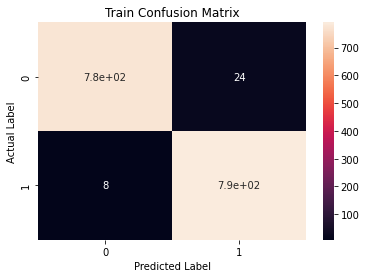

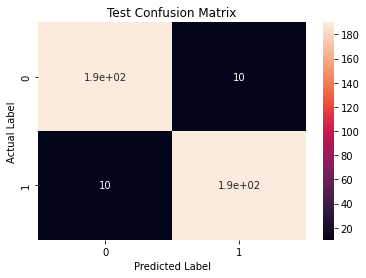

In [ ]:
# Gaussian navie bayes + Bow
gnb = GaussianNB()
gnb.fit(X_train_BOW,y_train)
y_train_pred = gnb.predict(X_train_BOW)
y_test_pred = gnb.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9806128830519074
Test Accuracy :  0.9075
Train Precision :  0.9626506024096385
Test Precision :  0.8654708520179372
Train F1-score :  0.9809699201964395
Test F1-score :  0.912529550827423


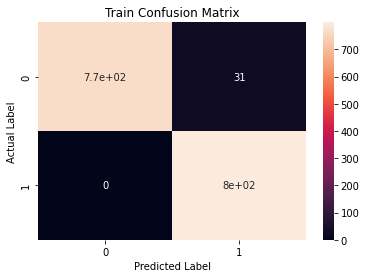

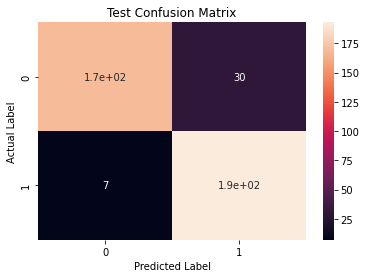

In [ ]:
# Gaussian Naive Bayes + Bow(ngram range = (1,2))
gnb = GaussianNB()
gnb.fit(X_train_BOW_2,y_train)
y_train_pred = gnb.predict(X_train_BOW_2)
y_test_pred = gnb.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9949968730456535
Test Accuracy :  0.935
Train Precision :  0.9987389659520807
Test Precision :  0.953125
Train F1-score :  0.9949748743718592
Test F1-score :  0.9336734693877552


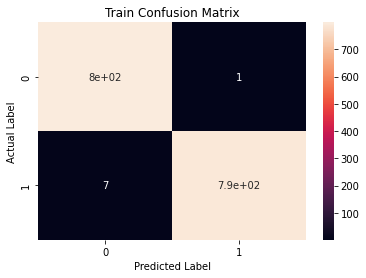

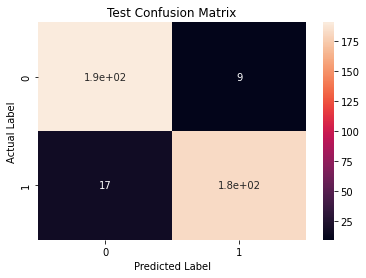

In [ ]:
# Gaussian Naive Bayes + Tfidf
gnb = GaussianNB()
gnb.fit(X_train_TFIDF,y_train)
y_train_pred = gnb.predict(X_train_TFIDF)
y_test_pred = gnb.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9787367104440275
Test Accuracy :  0.9625
Train Precision :  0.9799247176913425
Test Precision :  0.964824120603015
Train F1-score :  0.9786967418546367
Test F1-score :  0.9624060150375939


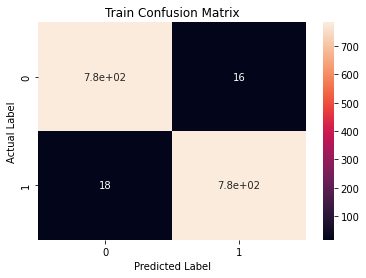

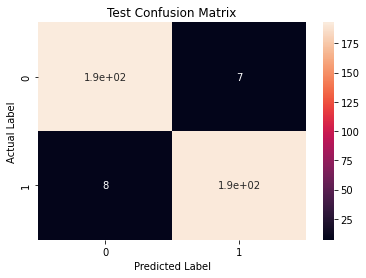

In [ ]:
# Multinomial Naive Bayes + Bow
mnb = MultinomialNB()
mnb.fit(X_train_BOW,y_train)
y_train_pred = mnb.predict(X_train_BOW)
y_test_pred = mnb.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9956222639149468
Test Accuracy :  0.9775
Train Precision :  0.995
Test Precision :  0.9751243781094527
Train F1-score :  0.9956222639149468
Test F1-score :  0.9775561097256857


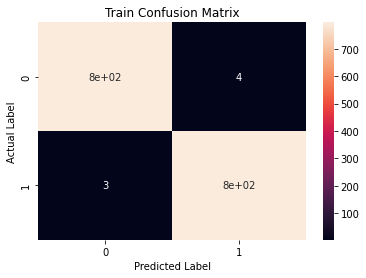

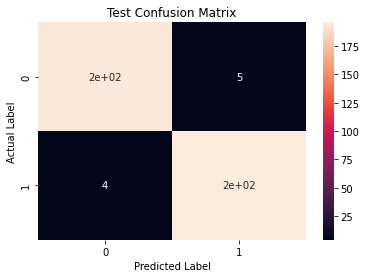

In [ ]:
# Multinomial Naive Bayes + BOW (ngram_range = (1,2))
mnb = MultinomialNB()
mnb.fit(X_train_BOW_2,y_train)
y_train_pred = mnb.predict(X_train_BOW_2)
y_test_pred = mnb.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9824890556597874
Test Accuracy :  0.965
Train Precision :  0.9873577749683944
Test Precision :  0.9603960396039604
Train F1-score :  0.9823899371069182
Test F1-score :  0.9651741293532338


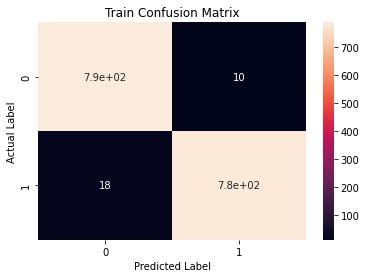

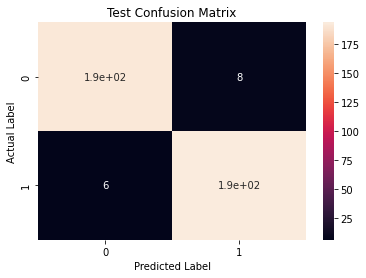

In [ ]:
# Multinomial Naive Bayes + TFIDF
mnb = MultinomialNB()
mnb.fit(X_train_TFIDF,y_train)
y_train_pred = mnb.predict(X_train_TFIDF)
y_test_pred = mnb.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9831144465290806
Test Accuracy :  0.97
Train Precision :  0.9948717948717949
Test Precision :  0.9795918367346939
Train F1-score :  0.9829005699810006
Test F1-score :  0.9696969696969697


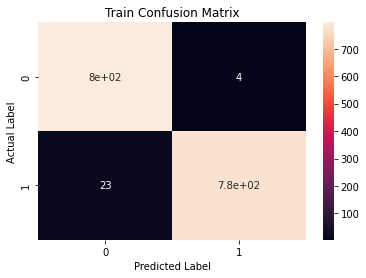

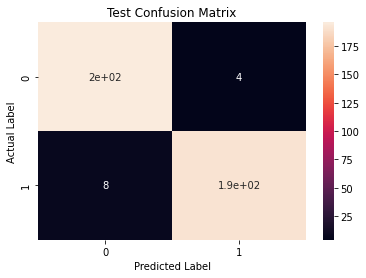

In [ ]:
# Bernoulli Naive Bayes + Bow
bnb = BernoulliNB()
bnb.fit(X_train_BOW,y_train)
y_train_pred = bnb.predict(X_train_BOW)
y_test_pred = bnb.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9949968730456535
Test Accuracy :  0.9675
Train Precision :  1.0
Test Precision :  0.9844559585492227
Train F1-score :  0.9949685534591194
Test F1-score :  0.9669211195928753


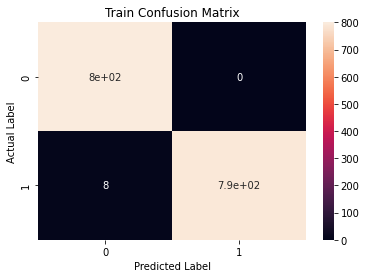

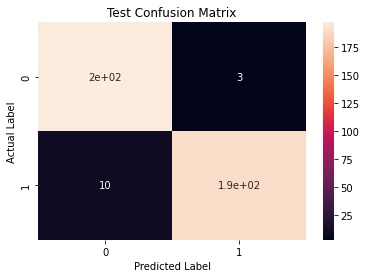

In [ ]:
# Bernoulli Naive Bayes + BOW(ngram_range = (1,2))
bnb = BernoulliNB()
bnb.fit(X_train_BOW_2,y_train)
y_train_pred = bnb.predict(X_train_BOW_2)
y_test_pred = bnb.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9831144465290806
Test Accuracy :  0.97
Train Precision :  0.9948717948717949
Test Precision :  0.9795918367346939
Train F1-score :  0.9829005699810006
Test F1-score :  0.9696969696969697


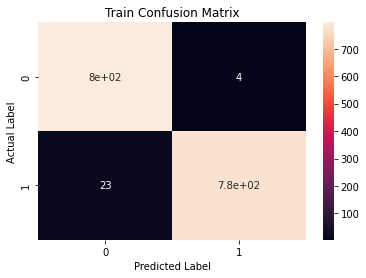

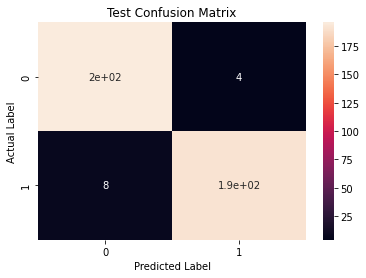

In [ ]:
# Bernoulli Naive Bayes + TFIDF
bnb = BernoulliNB()
bnb.fit(X_train_TFIDF,y_train)
y_train_pred = bnb.predict(X_train_TFIDF)
y_test_pred = bnb.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Logistic Regression

Train Accuracy :  0.99812382739212
Test Accuracy :  0.9525
Train Precision :  1.0
Test Precision :  0.9641025641025641
Train F1-score :  0.9981191222570532
Test F1-score :  0.9518987341772152


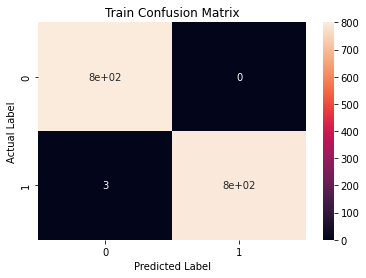

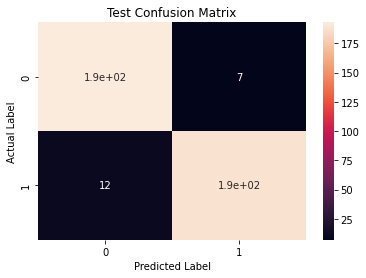

In [ ]:
# Logistic Regression + BOW
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "log")
sgd.fit(X_train_BOW,y_train)
y_train_pred = sgd.predict(X_train_BOW)
y_test_pred = sgd.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9987492182614134
Test Accuracy :  0.9475
Train Precision :  1.0
Test Precision :  0.9685863874345549
Train F1-score :  0.9987468671679198
Test F1-score :  0.9462915601023018


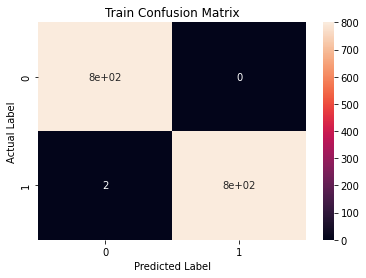

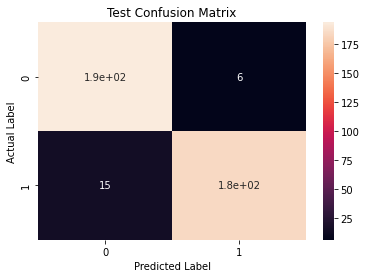

In [ ]:
# logistic regression + BOW(ngram_range = (1,2))
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "log")
sgd.fit(X_train_BOW_2,y_train)
y_train_pred = sgd.predict(X_train_BOW_2)
y_test_pred = sgd.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9968730456535334
Test Accuracy :  0.965
Train Precision :  0.9974937343358395
Test Precision :  0.9514563106796117
Train F1-score :  0.9968691296180338
Test F1-score :  0.9655172413793104


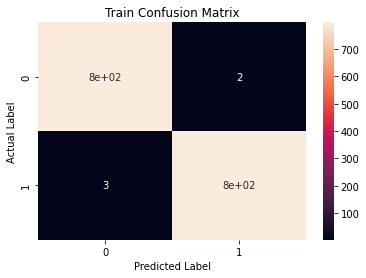

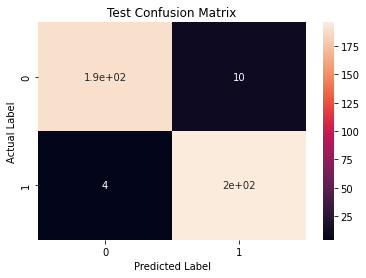

In [ ]:
# logisti  regression + Tfidf
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "log")
sgd.fit(X_train_TFIDF,y_train)
y_train_pred = sgd.predict(X_train_TFIDF)
y_test_pred = sgd.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Support Vector Machine

Train Accuracy :  0.8236397748592871
Test Accuracy :  0.7925
Train Precision :  0.781897491821156
Test Precision :  0.7671232876712328
Train F1-score :  0.8356643356643357
Test F1-score :  0.8019093078758951


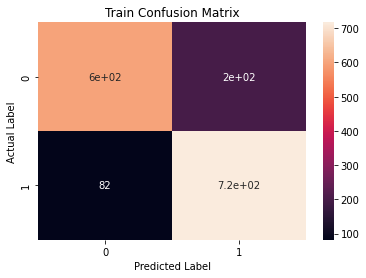

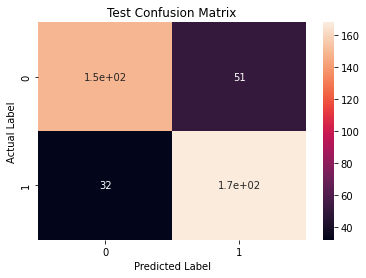

In [ ]:
#Svm + Bow
from sklearn.svm import SVC
svm = SVC(C=0.1)
svm.fit(X_train_BOW,y_train)
y_train_pred = svm.predict(X_train_BOW)
y_test_pred = svm.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.7554721701063164
Test Accuracy :  0.7325
Train Precision :  0.6827956989247311
Test Precision :  0.7657142857142857
Train F1-score :  0.7958224543080938
Test F1-score :  0.7146666666666666


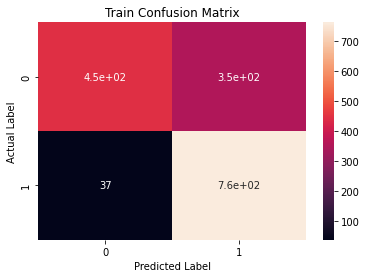

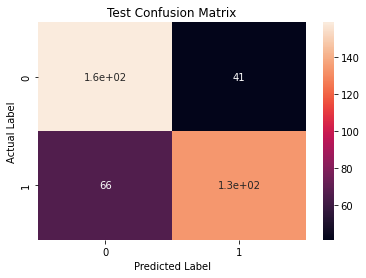

In [ ]:
#svm +bow(ngram range = (1,2))
svm = SVC(C=0.1)
svm.fit(X_train_BOW_2,y_train)
y_train_pred = svm.predict(X_train_BOW_2)
y_test_pred = svm.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.6516572858036273
Test Accuracy :  0.64
Train Precision :  0.9959016393442623
Test Precision :  0.9827586206896551
Train F1-score :  0.4659635666347076
Test F1-score :  0.44186046511627897


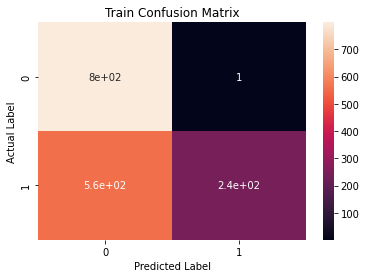

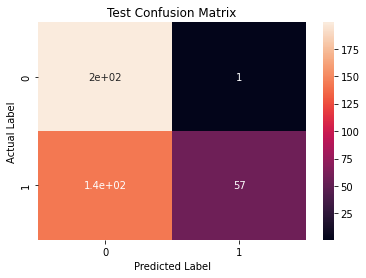

In [ ]:
#svm + TFIDF
svm = SVC(C=0.1)
svm.fit(X_train_TFIDF,y_train)
y_train_pred = svm.predict(X_train_TFIDF)
y_test_pred = svm.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

K-Nearest Neighbors

Train Accuracy :  0.6635397123202001
test_Accuracy :  0.63
Train Precision :  0.9851301115241635
Test Precision :  1.0
Train F1-score : 0.49625468164794007
Test F1-score : 0.41269841269841273


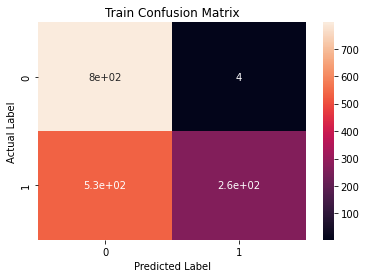

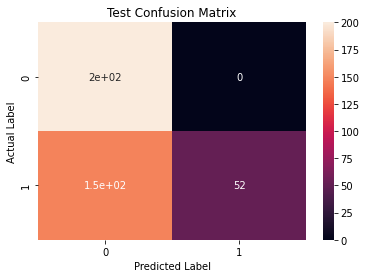

In [ ]:
# KNN + BOW
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_BOW,y_train)
y_train_pred = knn.predict(X_train_BOW)
y_test_pred = knn.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.6848030018761726
test_Accuracy :  0.5875
Train Precision :  0.9933110367892977
Test Precision :  1.0
Train F1-score : 0.5409836065573771
Test F1-score : 0.2978723404255319


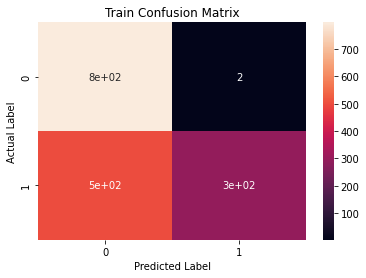

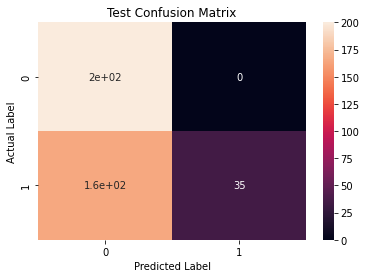

In [ ]:
# KNN + BOW(ngram range = (1,2))
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_BOW_2,y_train)
y_train_pred = knn.predict(X_train_BOW_2)
y_test_pred = knn.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.632895559724828
test_Accuracy :  0.58
Train Precision :  0.9907407407407407
Test Precision :  1.0
Train F1-score : 0.4216748768472907
Test F1-score : 0.2758620689655173


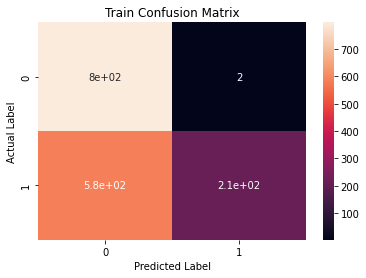

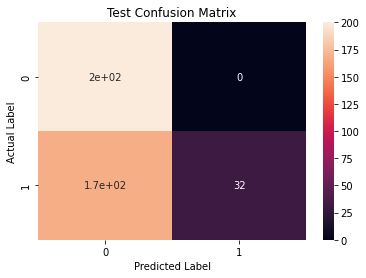

In [ ]:
# KNN + TFIDF
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_TFIDF,y_train)
y_train_pred = knn.predict(X_train_TFIDF)
y_test_pred = knn.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Random Forest

Train Accuracy :  0.99812382739212
test_Accuracy :  0.955
Train Precision :  1.0
Test Precision :  0.9840425531914894
Train F1-score : 0.9981191222570532
Test F1-score : 0.9536082474226805


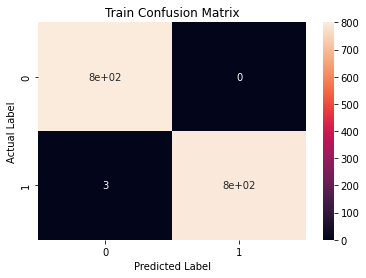

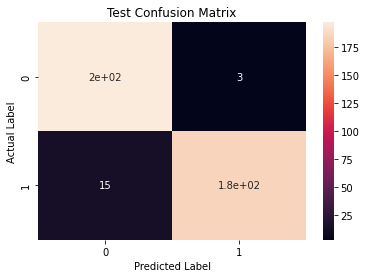

In [ ]:
#random forest + BOW
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_BOW , y_train)
y_train_pred = rfc.predict(X_train_BOW)
y_test_pred = rfc.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9987492182614134
test_Accuracy :  0.9375
Train Precision :  1.0
Test Precision :  0.9888268156424581
Train F1-score : 0.9987468671679198
Test F1-score : 0.9340369393139841


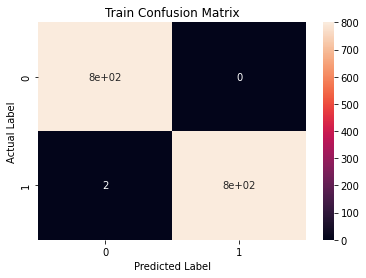

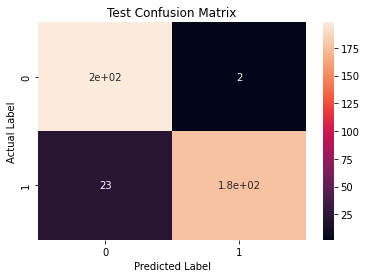

In [ ]:
#random forest + BOW(ngram range = (1,2))
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_BOW_2 , y_train)
y_train_pred = rfc.predict(X_train_BOW_2)
y_test_pred = rfc.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.99812382739212
test_Accuracy :  0.945
Train Precision :  1.0
Test Precision :  0.9587628865979382
Train F1-score : 0.9981191222570532
Test F1-score : 0.9441624365482233


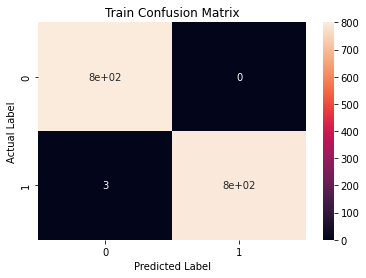

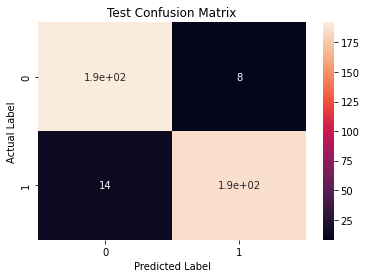

In [ ]:
#random forest + TFIDF
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_TFIDF , y_train)
y_train_pred = rfc.predict(X_train_TFIDF)
y_test_pred = rfc.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

XGboost

Train Accuracy :  0.8999374609130707
test_Accuracy :  0.8725
Train Precision :  0.9597122302158273
Test Precision :  0.9209039548022598
Train F1-score : 0.892904953145917
Test F1-score : 0.8647214854111405


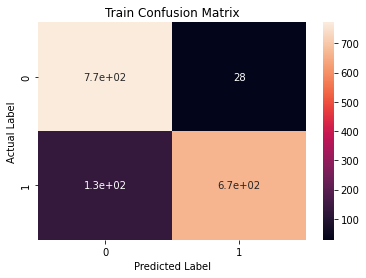

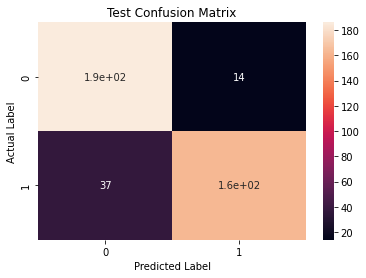

In [ ]:
# XGB + BOW
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_BOW , y_train)
y_train_pred = xgb.predict(X_train_BOW)
y_test_pred = xgb.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.8980612883051907
test_Accuracy :  0.875
Train Precision :  0.9555873925501432
Test Precision :  0.9166666666666666
Train F1-score : 0.8911155644622578
Test F1-score : 0.8684210526315789


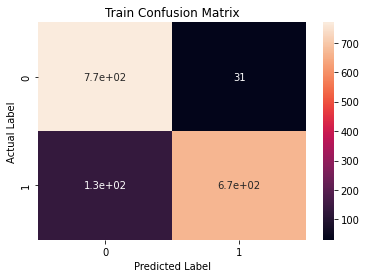

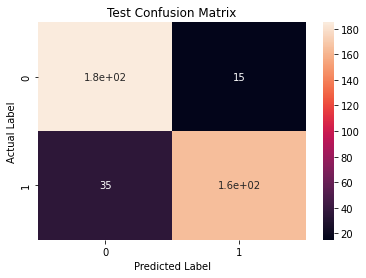

In [ ]:
# XGB + BOW(ngram_range = (1,2))
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_BOW_2 , y_train)
y_train_pred = xgb.predict(X_train_BOW_2)
y_test_pred = xgb.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.99812382739212
test_Accuracy :  0.945
Train Precision :  1.0
Test Precision :  0.9587628865979382
Train F1-score : 0.9981191222570532
Test F1-score : 0.9441624365482233


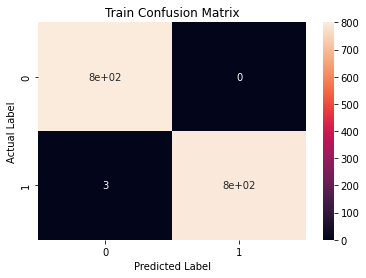

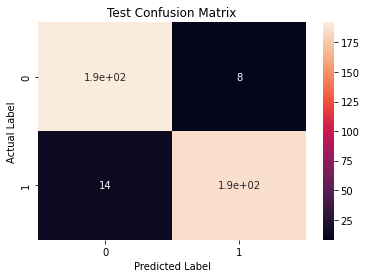

In [ ]:
# XGB + TFIDF
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_TFIDF , y_train)
y_train_pred = rfc.predict(X_train_TFIDF)
y_test_pred = rfc.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


Extra Trees Classifier

Train Accuracy :  0.99812382739212
test_Accuracy :  0.9525
Train Precision :  1.0
Test Precision :  0.9641025641025641
Train F1-score : 0.9981191222570532
Test F1-score : 0.9518987341772152


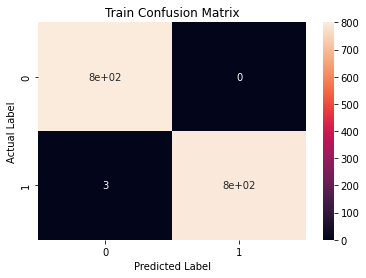

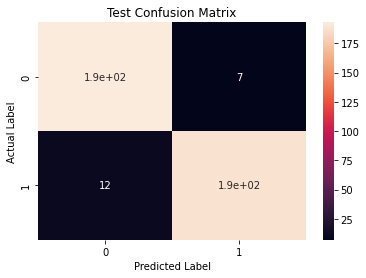

In [ ]:
# Extra Trees Classifer + BOW
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_BOW,y_train)
y_train_pred = etc.predict(X_train_BOW)
y_test_pred = etc.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9987492182614134
test_Accuracy :  0.9275
Train Precision :  1.0
Test Precision :  0.9723756906077348
Train F1-score : 0.9987468671679198
Test F1-score : 0.9238845144356955


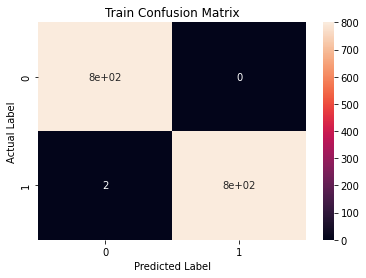

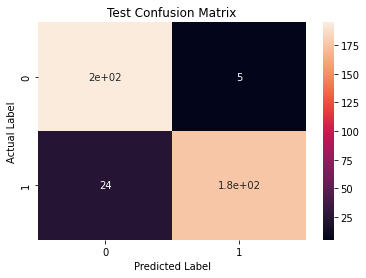

In [ ]:
# Extra Trees Classifer + BOW(ngram range = (1,2))
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_BOW_2,y_train)
y_train_pred = etc.predict(X_train_BOW_2)
y_test_pred = etc.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.99812382739212
test_Accuracy :  0.955
Train Precision :  1.0
Test Precision :  0.9504950495049505
Train F1-score : 0.9981191222570532
Test F1-score : 0.9552238805970149


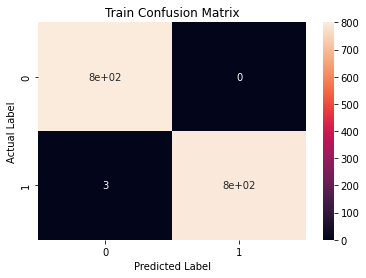

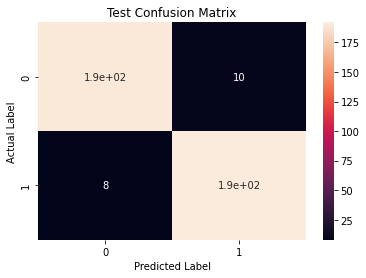

In [ ]:
# Extra Trees Classifer + TFIDF
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_TFIDF,y_train)
y_train_pred = etc.predict(X_train_TFIDF)
y_test_pred = etc.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
# Tfidf + preprocessed_length
X_train_TFIDF= hstack([X_train_tfidf,X_train['preprocessed_length'].values.reshape(-1,1)]).toarray()
X_test_TFIDF = hstack([X_test_tfidf,X_test['preprocessed_length'].values.reshape(-1,1)]).toarray()
print(X_train_TFIDF.shape)
print(X_test_TFIDF.shape)

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
# create a LogisticsRegression instance
etc = ExtraTreesClassifier(random_state = 42)

# define parameters grid
parameters = [
    {
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,100,150,200, 400, 600, 800, 1000, 1200]
    }
]

# Define GridSearchCV
grid_search = GridSearchCV(etc, param_grid = parameters)

# fit GridSearchCV
model = grid_search.fit(X_train_TFIDF,y_train)

# find the best estimator 
print (model.best_estimator_)

# predict y values
# y_pred = model.predict(X_test)

In [ ]:
# Extra Trees Classifer + TFIDF
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 250)
etc.fit(X_train_TFIDF,y_train)
y_train_pred = etc.predict(X_train_TFIDF)
y_test_pred = etc.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Modelling on Balanced Dataset

In [ ]:
# Balancing dataset
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
# The dataset is imbalanced
# Random oversampling duplicates examples from the minority class in the training dataset
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.93)
X_new,y_new=os.fit_resample(X,y)

In [ ]:
print(X_new.shape)
print(y_new.shape)

In [ ]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.22,random_state=2,stratify = y_new )

NameError: ignored

In [ ]:
# Tfidf Vectorizer
tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit(X_train['preprocessed_text'].values.astype('U'))
X_train_tfidf = tfidf_vec.transform(X_train['preprocessed_text'].values.astype('U'))
X_test_tfidf = tfidf_vec.transform(X_test['preprocessed_text'].values.astype('U'))

In [ ]:
# Tfidf + Numerical features
X_train_TFIDF= hstack([X_train_tfidf,X_train['preprocessed_length'].values.reshape(-1,1),X_train['digits_count'].values.reshape(-1,1)]).toarray()
X_test_TFIDF = hstack([X_test_tfidf,X_test['preprocessed_length'].values.reshape(-1,1),X_test['digits_count'].values.reshape(-1,1)]).toarray()
print(X_train_TFIDF.shape)
print(X_test_TFIDF.shape)

In [ ]:
# Extra Trees Classifer + TFIDF(with balanced dataset)
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_TFIDF,y_train)
y_train_pred = etc.predict(X_train_TFIDF)
y_test_pred = etc.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Prediction

In [ ]:
import base64
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import re

import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from scipy.sparse import hstack
ps = PorterStemmer()
def data_preprocessing(text):
    '''
    Function to prepreocess and clean the data
    '''

    # lowercasing the text
    text = text.lower()

    # Expanding Contractions(Decontractions)
    def decontracted(text):
        '''
        Function to expand the contractions
        '''
        # specific
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"can\'t", "can not", text)

        # general
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)
        return text
    text = decontracted(text)

    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # remove punctuation and special characters
    def remove_punctuation(text):
        '''
        Function to remove special character and punctuation from text
        '''
        text = nltk.word_tokenize(text)
        lst = []
        for i in text:
            if i not in string.punctuation:
                lst.append(i)
        text = lst[:]
        return ' '.join(lst)
    text = remove_punctuation(text)

    # remove stopwords
    def remove_stopwords(text):
        '''
        Function to rmove stopwords from a given text
        '''
        lst = []
        for char in text.split():
            if char not in stopwords.words('english'):
                lst.append(char)
        return ' '.join(lst)

    text = remove_stopwords(text)

    # remove digits
    def remove_digits(text):
        '''
        Fuction to remove digits from a given text
        '''
        lst = []
        for char in text:
            if not char.isdigit():
                lst.append(char)
        return ''.join(lst)
    text = remove_digits(text)

    # remove everything except alphabet
    text = re.sub(r'[^a-zA-Z ]+', '', text)

    # remove extra spaces from the text
    text = re.sub(' +', ' ', text)

    # Stemming
    text = ' '.join(ps.stem(word) for word in text.split(' '))

    return text

In [ ]:
  # Prediction 
  msg = input("Enter the Message : ")
  print("Message : {}".format(msg))
  preprocessed_message = data_preprocessing(msg)
  vectorizer = tfidf_vec.transform([preprocessed_message])
  def digits_count(string):
        '''
        Function to compute number of digits in a given text
        '''
        digit_count = 0
        for i in range(len(string)):
            if (string[i].isalpha()):
                continue
            elif (string[i].isdigit()):
                digit_count += 1
            elif (string[i] == ' '):
                continue
            else:
                continue
        return digit_count

  length = len(preprocessed_message)
  digits = digits_count(msg)
  features = hstack([vectorizer,length,digits]).toarray()
  result = etc.predict(features)[0]
  probability_spam = etc.predict_proba(features)[0][1]
  probability_ham = etc.predict_proba(features)[0][0]

  if result == 0:
    print("This is NOT a spam message")
    print("probability of ham : {}",probability_ham)
  else:
    print("This is the SPAM message")
    print("Probability of spam : ", probability_spam)

In [ ]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Classifier", "Data", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision","Train F1-score", "Test F1-score"])
  
# Add rows
myTable.add_row(["Gaussian Naive Bayes","Numerical Features + BOW" ,"0.9315", "0.8820", "0.6484", "0.5198","0.7867","0.6592"])
myTable.add_row(["Gaussian Naive Bayes","Numerical Features + BOW(Bi-gram)","0.9859","0.9284", "0.9", "0.6401","0.9473","0.7730",])
myTable.add_row(["Gaussian Naive Bayes", "Numrical Features + TFIDF", "0.9339", "0.8839","0.6566","0.5246","0.7927","0.6610"])
myTable.add_row(["Multinomial Naive Bayes", "Numerical Features + BOW", "0.9862", "0.9845","0.9567","0.9457","0.9447","0.9384"])
myTable.add_row(["Multinomial Naive Bayes", "Numerical Features + BOW(Bi-gram)", "0.9912", "0.9806","0.9821","0.9586","0.9649","0.9206"])
myTable.add_row(["Multinomial Naive Bayes","Numerical Features + TFIDF" ,"0.9685", "0.9748", "0.9100", "0.9411","0.87","0.896"])
myTable.add_row(["Bernoulli Naive Bayes", "Numerical Features + BOW", "0.9828", "0.9806","0.9870","1.0","0.9279","0.9173"])
myTable.add_row(["Bernoulli Naive Bayes", "Numerical Features + BOW(Bi-gram)", "0.9567", "0.9245","0.9803","1.0","0.7963","0.5760"])
myTable.add_row(["Bernoulli Naive Bayes","Numerical Features + TFIDF" ,"0.9828", "0.9806", "0.9870", "1.0","0.9279","0.9173"])
myTable.add_row(["Logistic Regression", "Numerical Features + BOW", "0.9552", "0.9574","0.9884","0.9780","0.7866","0.8018"])
myTable.add_row(["Logistic Regression", "Numerical Features + BOW(Bi-gram)", "0.9748", "0.9738","0.9644","0.9561","0.8930","0.8897"])
myTable.add_row(["Logistic Regression","Numerical Features + TFIDF" ,"0.9579", "0.9593", "0.7939", "0.7870","0.8438","0.8531"])
myTable.add_row(["SVM", "Numerical Features + BOW", "0.9615", "0.9661","0.9892","0.9897","0.8219","0.8471"])
myTable.add_row(["SVM", "Numerical Features + BOW(Bi-gram)", "0.9615", "0.9661","0.9892","0.9897","0.8219","0.8471"])
myTable.add_row(["SVM","Numerical Features + TFIDF" ,"0.9613", "0.9661", "0.9865", "0.9897","0.8210","0.8471"])
myTable.add_row(["KNN", "Numerical Features + BOW", "0.9782", "0.9787","0.9556","0.9430","0.9096","0.9133"])
myTable.add_row(["KNN", "Numerical Features + BOW(Bi-gram)", "0.9792", "0.9796","0.9560","0.9365","0.9139","0.9182"])
myTable.add_row(["KNN","Numerical Features + TFIDF" ,"0.9779", "0.9748", "0.9614", "0.9411","0.9079","0.8960"])
myTable.add_row(["Random Forest", "Numerical Features + BOW", "1.0", "0.9893","1.0","0.9838","1.0","0.9568"])
myTable.add_row(["Random Forest", "Numerical Features + BOW(Bi-gram)", "1.0", "0.9874","1.0","0.9916","1.0","0.9482"])
myTable.add_row(["Random Forest","Numerical Features + TFIDF" ,"1.0", "0.9864", "1.0", "0.9834","1.0","0.9444"])
myTable.add_row(["XG Boost", "Numerical Features + BOW", "0.9850", "0.9854","0.9831","0.9754","0.9378","0.9407"])
myTable.add_row(["XG Boost", "Numerical Features + BOW(Bi-gram)", "0.9850", "0.9854","0.9831","0.9754","0.9378","0.9407"])
myTable.add_row(["XG Boost","Numerical Features + TFIDF" ,"1.0", "0.9864", "1.0", "0.9834","1.0","0.9444"])
myTable.add_row(["Extra Tree Classifier", "Numerical Features + BOW", "1.0", "0.9903","1.0","0.9918","1.0","0.9606"])
myTable.add_row(["Extra Tree Classifier", "Numerical Features + BOW(Bi-gram)", "1.0", "0.9854","1.0","1.0","1.0","0.9392"])
myTable.add_row(["Extra Tree Classifier","Numerical Features + TFIDF" ,"1.0", "0.9912", "1.0", "0.9919","1.0","0.9647"])
myTable.add_row(["Extra Tree Classifier","Numerical Features + TFIDF(with balanced dataset)" ,"1.0", "0.9994", "1.0", "0.9989","1.0","0.9994"])


print(myTable)


We can clearly see that Extra Tree Classifier with TFIDF Vectorizer performs better than any other model

In [ ]:
import pickle
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))

In [ ]:
from google.colab import files
files.download('model.pkl') 

In [ ]:
from google.colab import files
files.download('vectorizer.pkl') 

TypeError: ignored

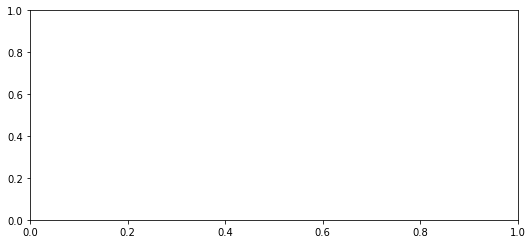

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Linear Regression','Lasso Regression','Ridge Regression','Light GBM','Random Forest','K- Nearest Neighbors','Multi Layes Perceptron']
Train_MAPE = [0.0415,0.0412,0.0415,0.0332,0.000086,0.000430,0.0361]
Test_MAPE = [0.044,0.044,0.044,0.036,0.00536,0.0108,0.0407]
  
X_axis = 6
  
plt.bar(X_axis - 0.2, Train_MAPE, 0.4, label = 'Train_MAPE')
plt.bar(X_axis + 0.2, Test_MAPE, 0.4, label = 'Test_MAPE')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("MAPE")
plt.title("Train and Test MAPE of all the Models")
plt.legend()
plt.show()

ValueError: ignored

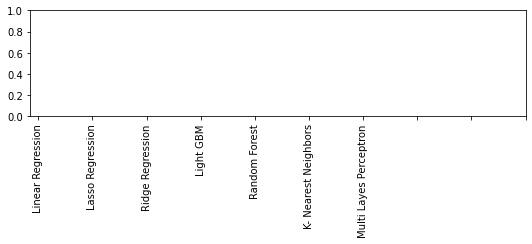

In [ ]:
Train_MAPE = [0.0415,0.0412,0.0415,0.0332,0.000086,0.000430,0.0361]
Test_MAPE = [0.044,0.044,0.044,0.036,0.00536,0.0108,0.0407]
x = np.arange(10)
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, ['Linear Regression','Lasso Regression','Ridge Regression','Light GBM','Random Forest','K- Nearest Neighbors','Multi Layes Perceptron'], rotation='vertical')
train_mape =ax1.bar(x,Train_MAPE , width=w, color='b', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
gdp =ax2.bar(x + w,[0.044,0.044,0.044,0.036,0.00536,0.0108,0.0407], width=w,color='g',align='center')
#Set the Y axis label as GDP.
plt.ylabel('GDP')
#To set the legend on the plot we have used plt.legend()
plt.legend([pop, gdp],['Population in Millions', 'GDP in Billions'])
#To show the plot finally we have used plt.show().
plt.show()

ValueError: ignored

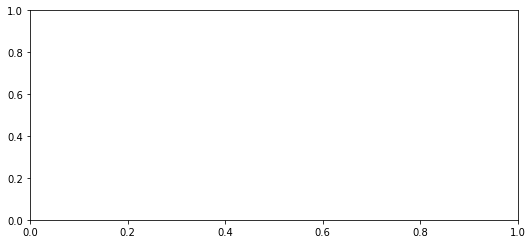

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Array for horizontal bar's position
ind = np.array([0, 1, 2])

# Bar's width
width = 0.4

fig, ax = plt.subplots()

# Horizontal bar plot
ax.barh(ind, np.array([1.1,1.2,1.3,1.4,1.5,1.6,1.7]), width, color='Train_MAPE', label='N')
ax.barh(ind + width, np.array([0.044,0.044,0.044,0.036,0.00536,0.0108,0.0407]), width, color='Test_MAPE', label='M')

# Set Y-axis ticks and ticklabels
ax.set(yticks=ind + width, yticklabels=np.array(['Linear Regression','Lasso Regression','Ridge Regression','Light GBM','Random Forest','K- Nearest Neighbors','Multi Layes Perceptron']),ylim = [2*width - 1, len(ind)])

# Legend at the upper right corner
ax.legend(loc='upper right')

# Display the plot
plt.show()

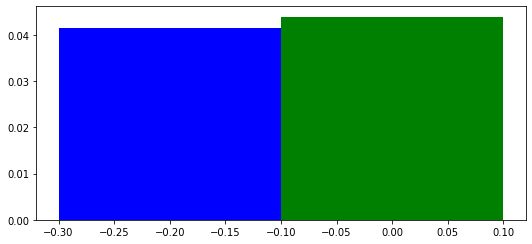

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x = [['Linear Regression','Lasso Regression','Ridge Regression','Light GBM','Random Forest','K- Nearest Neighbors','Multi Layes Perceptron']]
x_axis = np.arange(len(x))
y = [0.0415,0.0412,0.0415,0.0332,0.000086,0.000430,0.0361]
z = [0.044,0.044,0.044,0.036,0.00536,0.0108,0.0407]

ax = plt.subplot(111)
ax.bar(x_axis-0.2, y, width=0.2, color='b', align='center')
ax.bar(x_axis, z, width=0.2, color='g', align='center')



plt.show()

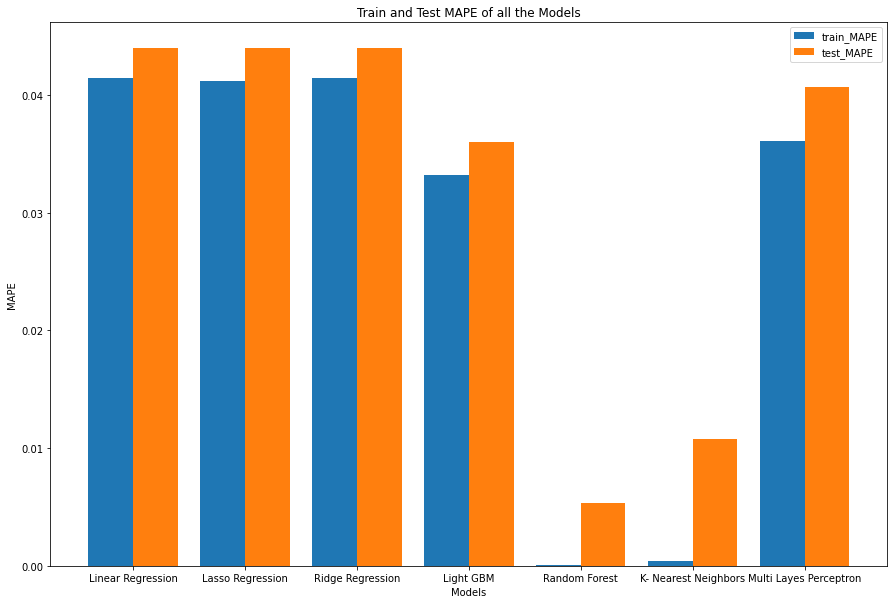

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
w =0.4
models = ['Linear Regression','Lasso Regression','Ridge Regression','Light GBM','Random Forest','K- Nearest Neighbors','Multi Layes Perceptron']

train_mape = [0.0415,0.0412,0.0415,0.0332,0.000086,0.000430,0.0361]
test_mape = [0.044,0.044,0.044,0.036,0.00536,0.0108,0.0407]
plt.figure(figsize=(15,10))
bar1 = np.arange(len(models))
bar2 = [i+w for i in bar1]

plt.bar(models,train_mape,w,label="train_MAPE")
plt.bar(bar2,test_mape,w ,label = "test_MAPE")
plt.title("Train and Test MAPE of all the Models")
plt.xticks(bar1+w/2,models)
plt.xlabel("Models")
plt.ylabel("MAPE")
plt.legend()

In [ ]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Classifier", "Feature Set", "Accuracy", "Precision", "F1-score"])
  
# Add rows
myTable.add_row(["Gaussian Naive Bayes","Count Vectorizer", "0.95", "0.95","0.0.95"])
myTable.add_row(["Gaussian Naive Bayes","Count Vectorizer(n_gram range(1,2))","0.9075" , "0.8654","0.9125",])
myTable.add_row(["Gaussian Naive Bayes", "TFIDF", "0.935","0.9531","0.9336"])
myTable.add_row(["Multinomial Naive Bayes", "Count Vectorizer", "0.9625","0.9648","0.9624"])
myTable.add_row(["Multinomial Naive Bayes", "Count Vectorizer(n_gram range(1,2))", "0.9775","0.9751","0.9775"])
myTable.add_row(["Multinomial Naive Bayes","TFIDF" , "0.965", "0.9603","0.9651"])
myTable.add_row(["Bernoulli Naive Bayes", "Count Vectorizer", "0.97","0.9795","0.9696"])
myTable.add_row(["Bernoulli Naive Bayes", "Count Vectorizer(n_gram range(1,2))", "0.9675","0.9844","0.9669"])
myTable.add_row(["Bernoulli Naive Bayes","TFIDF" , "0.97", "0.9795","0.9696"])
myTable.add_row(["Logistic Regression", "Count Vectorizer", "0.9525","0.9641","0.9518"])
myTable.add_row(["Logistic Regression", "Count Vectorizer(n_gram range(1,2))", "0.9475","0.9685","0.9462"])
myTable.add_row(["Logistic Regression","TFIDF", "0.965", "0.9514","0.9655"])
myTable.add_row(["SVM", "Count Vectorizer", "0.7925","0.7671","0.8019"])
myTable.add_row(["SVM", "Count Vectorizer(n_gram range(1,2))", "0.7325","0.7657","0.7146"])
myTable.add_row(["SVM","TFIDF" , "0.64", "0.9827","0.4418"])
myTable.add_row(["KNN", "Count Vectorizer", "0.63","1.0","0.4126"])
myTable.add_row(["KNN", "Count Vectorizer(n_gram range(1,2))", "0.5875","1.0","0.2978"])
myTable.add_row(["KNN","TFIDF" , "0.58", "1.0","0.2758"])
myTable.add_row(["Random Forest", "Count Vectorizer", "0.955","0.9840","0.9536"])
myTable.add_row(["Random Forest", "Count Vectorizer(n_gram range(1,2))", "0.9375","0.9888","0.9340"])
myTable.add_row(["Random Forest","TFIDF", "0.945", "0.9587","0.9441"])
myTable.add_row(["XG Boost", "Count Vectorizer", "0.8725","0.9209","0.8647"])
myTable.add_row(["XG Boost", "Count Vectorizer(n_gram range(1,2))", "0.875","0.9166","0.8684"])
myTable.add_row(["XG Boost","TFIDF" , "0.945", "0.9587","0.9441"])
myTable.add_row(["Extra Tree Classifier", "Count Vectorizer", "0.9525","0.9641","0.9518"])
myTable.add_row(["Extra Tree Classifier", "Count Vectorizer(n_gram range(1,2))", "0.9275","0.9723","0.9238"])
myTable.add_row(["Extra Tree Classifier","TFIDF" , "0.955", "0.9504","0.9552"])
#myTable.add_row(["Extra Tree Classifier","Numerical Features + TFIDF(with balanced dataset)" ,"1.0", "0.9994", "1.0", "0.9989","1.0","0.9994"])


print(myTable)

+-------------------------+-------------------------------------+----------+-----------+----------+
|        Classifier       |             Feature Set             | Accuracy | Precision | F1-score |
+-------------------------+-------------------------------------+----------+-----------+----------+
|   Gaussian Naive Bayes  |           Count Vectorizer          |   0.95   |    0.95   |  0.0.95  |
|   Gaussian Naive Bayes  | Count Vectorizer(n_gram range(1,2)) |  0.9075  |   0.8654  |  0.9125  |
|   Gaussian Naive Bayes  |                TFIDF                |  0.935   |   0.9531  |  0.9336  |
| Multinomial Naive Bayes |           Count Vectorizer          |  0.9625  |   0.9648  |  0.9624  |
| Multinomial Naive Bayes | Count Vectorizer(n_gram range(1,2)) |  0.9775  |   0.9751  |  0.9775  |
| Multinomial Naive Bayes |                TFIDF                |  0.965   |   0.9603  |  0.9651  |
|  Bernoulli Naive Bayes  |           Count Vectorizer          |   0.97   |   0.9795  |  0.9696  |


In [ ]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Classifier", "Feature Set", "Accuracy", "Precision", "F1-score"])
  
# Add rows
myTable.add_row(["Gaussian Naive Bayes","Count Vectorizer", "0.95", "0.95","0.0.95"])

myTable.add_row(["Gaussian Naive Bayes", "TFIDF", "0.935","0.9531","0.9336"])
myTable.add_row(["Multinomial Naive Bayes", "Count Vectorizer", "0.9625","0.9648","0.9624"])

myTable.add_row(["Multinomial Naive Bayes","TFIDF" , "0.965", "0.9603","0.9651"])
myTable.add_row(["Bernoulli Naive Bayes", "Count Vectorizer", "0.97","0.9795","0.9696"])
myTable.add_row(["Bernoulli Naive Bayes","TFIDF" , "0.97", "0.9795","0.9696"])
myTable.add_row(["Logistic Regression", "Count Vectorizer", "0.9525","0.9641","0.9518"])
myTable.add_row(["Logistic Regression","TFIDF", "0.965", "0.9514","0.9655"])
myTable.add_row(["SVM", "Count Vectorizer", "0.7925","0.7671","0.8019"])
myTable.add_row(["SVM","TFIDF" , "0.64", "0.9827","0.4418"])
myTable.add_row(["KNN", "Count Vectorizer", "0.63","1.0","0.4126"])
myTable.add_row(["KNN","TFIDF" , "0.58", "1.0","0.2758"])
myTable.add_row(["Random Forest", "Count Vectorizer", "0.955","0.9840","0.9536"])
myTable.add_row(["Random Forest","TFIDF", "0.945", "0.9587","0.9441"])
myTable.add_row(["XG Boost", "Count Vectorizer", "0.8725","0.9209","0.8647"])
myTable.add_row(["XG Boost","TFIDF" , "0.945", "0.9587","0.9441"])
myTable.add_row(["Extra Tree Classifier", "Count Vectorizer", "0.9525","0.9641","0.9518"])
myTable.add_row(["Extra Tree Classifier","TFIDF" , "0.955", "0.9504","0.9552"])

print(myTable)

+-------------------------+------------------+----------+-----------+----------+
|        Classifier       |   Feature Set    | Accuracy | Precision | F1-score |
+-------------------------+------------------+----------+-----------+----------+
|   Gaussian Naive Bayes  | Count Vectorizer |   0.95   |    0.95   |  0.0.95  |
|   Gaussian Naive Bayes  |      TFIDF       |  0.935   |   0.9531  |  0.9336  |
| Multinomial Naive Bayes | Count Vectorizer |  0.9625  |   0.9648  |  0.9624  |
| Multinomial Naive Bayes |      TFIDF       |  0.965   |   0.9603  |  0.9651  |
|  Bernoulli Naive Bayes  | Count Vectorizer |   0.97   |   0.9795  |  0.9696  |
|  Bernoulli Naive Bayes  |      TFIDF       |   0.97   |   0.9795  |  0.9696  |
|   Logistic Regression   | Count Vectorizer |  0.9525  |   0.9641  |  0.9518  |
|   Logistic Regression   |      TFIDF       |  0.965   |   0.9514  |  0.9655  |
|           SVM           | Count Vectorizer |  0.7925  |   0.7671  |  0.8019  |
|           SVM           | 

Multinomial naive bayes with count vectorizer with ngram range = (1,2)

In [ ]:
# RESULTS FOR ERON DATASET (DATASET )
from prettytable import PrettyTable

myTable = PrettyTable(["Classifier", "Feature Set", "Accuracy", "Precision", "F1-score"])
  
# Add rows
myTable.add_row(["Gaussian Naive Bayes","Count Vectorizer", "0.9589", "0.9532","0.9281"])
myTable.add_row(["Gaussian Naive Bayes","Count Vectorizer(n_gram range(1,2))","0.9779" , "0.9856","0.9615",])
myTable.add_row(["Gaussian Naive Bayes", "TFIDF", "0.9539","0.9303","0.9206"])
myTable.add_row(["Multinomial Naive Bayes", "Count Vectorizer", "0.9769","0.9591","0.9608"])
myTable.add_row(["Multinomial Naive Bayes", "Count Vectorizer(n_gram range(1,2))", "0.9809","0.9724","0.9674"])
myTable.add_row(["Multinomial Naive Bayes","TFIDF" , "0.9119", "0.9951","0.8240"])
myTable.add_row(["Bernoulli Naive Bayes", "Count Vectorizer", "0.8338","0.9044","0.6311"])
myTable.add_row(["Bernoulli Naive Bayes", "Count Vectorizer(n_gram range(1,2))", "0.7747","0.9594","0.3869"])
myTable.add_row(["Bernoulli Naive Bayes","TFIDF" , "0.8338", "0.9044","0.6311"])
myTable.add_row(["Logistic Regression", "Count Vectorizer", "0.9729","0.9683","0.9532"])
myTable.add_row(["Logistic Regression", "Count Vectorizer(n_gram range(1,2))", "0.9779","0.9624","0.9624"])
myTable.add_row(["Logistic Regression","TFIDF", "0.9879", "0.9730","0.9796"])
myTable.add_row(["SVM", "Count Vectorizer", "0.7187","1.0","0.078"])
myTable.add_row(["SVM", "Count Vectorizer(n_gram range(1,2))", "0.7137","1.0","0.0466"])
myTable.add_row(["SVM","TFIDF" , "0.7767", "1.0","0.3856"])
myTable.add_row(["KNN", "Count Vectorizer", "0.8588","0.69","0.7965"])
myTable.add_row(["KNN", "Count Vectorizer(n_gram range(1,2))", "0.7497","0.5411","0.6936"])
myTable.add_row(["KNN","TFIDF" , "0.6226", "0.4373","0.6085"])
myTable.add_row(["Random Forest", "Count Vectorizer", "0.9729","0.9586","0.9536"])
myTable.add_row(["Random Forest", "Count Vectorizer(n_gram range(1,2))", "0.9739","0.9556","0.9556"])
myTable.add_row(["Random Forest","TFIDF", "0.9709", "0.9429","0.9509"])
myTable.add_row(["XG Boost", "Count Vectorizer", "0.9669","0.9391","0.9439"])
myTable.add_row(["XG Boost", "Count Vectorizer(n_gram range(1,2))", "0.9679","0.9335","0.9461"])
myTable.add_row(["XG Boost","TFIDF" , "0.9709", "0.9429","0.9509"])
myTable.add_row(["Extra Tree Classifier", "Count Vectorizer", "0.9759","0.9559","0.9591"])
myTable.add_row(["Extra Tree Classifier", "Count Vectorizer(n_gram range(1,2))", "0.9719","0.9431","0.9527"])
myTable.add_row(["Extra Tree Classifier","TFIDF" , "0.9769", "0.9591","0.9608"])
#myTable.add_row(["Extra Tree Classifier","Numerical Features + TFIDF(with balanced dataset)" ,"1.0", "0.9994", "1.0", "0.9989","1.0","0.9994"])

print(myTable)


+-------------------------+-------------------------------------+----------+-----------+----------+
|        Classifier       |             Feature Set             | Accuracy | Precision | F1-score |
+-------------------------+-------------------------------------+----------+-----------+----------+
|   Gaussian Naive Bayes  |           Count Vectorizer          |  0.9589  |   0.9532  |  0.9281  |
|   Gaussian Naive Bayes  | Count Vectorizer(n_gram range(1,2)) |  0.9779  |   0.9856  |  0.9615  |
|   Gaussian Naive Bayes  |                TFIDF                |  0.9539  |   0.9303  |  0.9206  |
| Multinomial Naive Bayes |           Count Vectorizer          |  0.9769  |   0.9591  |  0.9608  |
| Multinomial Naive Bayes | Count Vectorizer(n_gram range(1,2)) |  0.9809  |   0.9724  |  0.9674  |
| Multinomial Naive Bayes |                TFIDF                |  0.9119  |   0.9951  |  0.8240  |
|  Bernoulli Naive Bayes  |           Count Vectorizer          |  0.8338  |   0.9044  |  0.6311  |


Logistic regression with tfidf perfoems better for eron dataset